https://itunes.apple.com/jp/genre/id6014

In [1]:
import sys
import re
import json
import pprint

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### 概要check

In [2]:
# df1 = pd.read_json('input/app_all_info_1.json')
# df2 = pd.read_json('input/app_all_info_2.json')
# df3 = pd.read_json('input/app_all_info_3.json')
# df4 = pd.read_json('input/app_all_info_4.json')
# df5 = pd.read_json('input/app_all_info_5.json')
# df6 = pd.read_json('input/app_all_info_6.json')
# df = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)
# df

In [3]:
# gotten_game_ids = list(df['id'].values)
# gotten_game_ids

In [4]:
# df = df.drop_duplicates(subset='id').reset_index(drop=True)
# df

In [5]:
# df = df.sort_values(by=['sub_genre_id', 'letter', 'page']).reset_index(drop=True)

In [6]:
# df.to_json('input/app_all_info.json')

In [7]:
df = pd.read_json('../input/app_all_info.json')

In [8]:
df.head()

,id,letter,page,request_at,resultCount,results,sub_genre_id
0,867982686,#,1,2020-06-29 21:28:26,1,"[{'appletvScreenshotUrls': [], 'screenshotUrls...",7001
1,963021263,#,1,2020-06-29 21:28:26,1,[{'ipadScreenshotUrls': ['https://is5-ssl.mzst...,7001
10,483504712,#,1,2020-06-29 21:28:28,1,[{'artistViewUrl': 'https://apps.apple.com/jp/...,7001
100,1031920100,A,1,2020-06-29 15:24:11,1,[{'screenshotUrls': ['https://is3-ssl.mzstatic...,7001
1000,1200399172,A,10,2020-06-29 15:25:15,1,[{'screenshotUrls': ['https://is4-ssl.mzstatic...,7001


In [9]:
df.shape

(199034, 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff952e23ac8>,
      dtype=object)

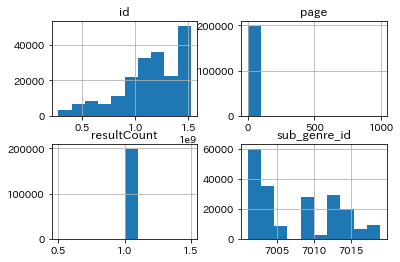

In [10]:
df.hist()

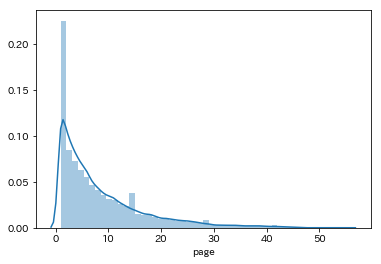

In [11]:
sns.distplot(df[df['page']<800]['page'])

In [12]:
df['page'].value_counts()

1      26845
2      21547
3      18170
4      15721
5      13529
6      11900
7       9942
8       8753
9       7564
10      6789
11      6417
12      5631
13      4984
14      4291
15      3767
16      3277
18      2980
17      2950
19      2469
21      2017
20      1984
22      1882
23      1673
24      1567
25      1466
26      1323
27      1190
28       917
29       870
30       584
31       568
34       566
33       561
32       554
35       452
38       436
39       427
37       423
36       400
41       297
40       294
42       286
43       239
44       154
45       133
46       103
51        26
47        20
53        19
54        18
50        18
48        11
55        10
52         8
49         8
991        4
Name: page, dtype: int64

In [13]:
df['letter'].value_counts()

S    23070
C    19527
B    15591
M    14541
P    12902
F    12182
T    11216
A    11101
D    10076
H     8064
R     7946
W     6928
G     6832
L     6416
E     5337
J     4227
K     4099
N     3635
I     3477
O     2647
V     2135
Z     1930
U     1908
Q     1134
#      891
Y      685
X      537
Name: letter, dtype: int64

In [14]:
df['resultCount'].unique()

array([1])

In [15]:
df['sub_genre_id'].value_counts()

7001    38530
7009    28159
7012    23400
7002    21420
7003    19369
7004    15882
7015    10527
7014     9293
7005     6596
7018     6277
7013     5646
7016     3987
7017     2850
7019     2803
7011     2510
7006     1785
Name: sub_genre_id, dtype: int64

In [16]:
# sub_genre_id_dict = {
#     'アクション': 7001,
#     'アドベンチャー': 7002,
#     'ボード': 7004,
#     'カード': 7005,
#     'カジノ': 7006,
#    'カジュアル': 7003,
#     'さいころ': 7007,
#     '教育': 7008,
#     'ファミリー': 7009,
#     'ミュージック': 7011,
#     'パズル': 7012,
#     'レーシング': 7013,
#     'ロールプレイング': 7014,
#     'シミュレーション': 7015,
#     'スポーツ': 7016,
#     'ストラテジー': 7017,
#     'トリビア': 7018,
#     '単語': 7019
# }

### results check

In [17]:
pprint.pprint(df.loc[0, 'results'][0])

{'advisories': [],
 'appletvScreenshotUrls': [],
 'artistId': 512943571,
 'artistName': 'ArtePiazza',
 'artistViewUrl': 'https://apps.apple.com/jp/developer/artepiazza/id512943571?uo=4',
 'artworkUrl100': 'https://is1-ssl.mzstatic.com/image/thumb/Purple117/v4/0a/b4/1b/0ab41b6c-45fa-0a63-98d8-8c4dd07f7680/source/100x100bb.jpg',
 'artworkUrl512': 'https://is1-ssl.mzstatic.com/image/thumb/Purple117/v4/0a/b4/1b/0ab41b6c-45fa-0a63-98d8-8c4dd07f7680/source/512x512bb.jpg',
 'artworkUrl60': 'https://is1-ssl.mzstatic.com/image/thumb/Purple117/v4/0a/b4/1b/0ab41b6c-45fa-0a63-98d8-8c4dd07f7680/source/60x60bb.jpg',
 'averageUserRating': 4,
 'averageUserRatingForCurrentVersion': 4,
 'bundleId': 'com.artepiazza.ios.appm050',
 'contentAdvisoryRating': '4+',
 'currency': 'JPY',
 'currentVersionReleaseDate': '2017-06-27T20:20:19Z',
 'description': 'みんなだいすきアルパカをつんつんしよう！\n'
                '\n'
                '●遊び方\n'
                'このゲームはアルパカのおなかに書いてある順番通りに\n'
                'アルパカをタッチするゲームです。\n'
    

In [18]:
results = pd.DataFrame([x[0] for x in df['results']])
results

,advisories,appletvScreenshotUrls,artistId,artistName,artistViewUrl,artworkUrl100,artworkUrl512,artworkUrl60,averageUserRating,averageUserRatingForCurrentVersion,bundleId,contentAdvisoryRating,currency,currentVersionReleaseDate,description,features,fileSizeBytes,formattedPrice,genreIds,genres,ipadScreenshotUrls,isGameCenterEnabled,isVppDeviceBasedLicensingEnabled,kind,languageCodesISO2A,minimumOsVersion,price,primaryGenreId,primaryGenreName,releaseDate,releaseNotes,screenshotUrls,sellerName,sellerUrl,supportedDevices,trackCensoredName,trackContentRating,trackId,trackName,trackViewUrl,userRatingCount,userRatingCountForCurrentVersion,version,wrapperType
0,[],[],512943571,ArtePiazza,https://apps.apple.com/jp/developer/artepiazza...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.00000,4.00000,com.artepiazza.ios.appm050,4+,JPY,2017-06-27T20:20:19Z,みんなだいすきアルパカをつんつんしよう！\n\n●遊び方\nこのゲームはアルパカのおなかに書...,[gameCenter],10155008,¥120,"[6014, 7001]","[ゲーム, アクション]",[],True,True,software,"[EN, JA]",7.0,120.0,6014,Games,2014-06-09T01:15:36Z,軽微なバグ修正,[https://is4-ssl.mzstatic.com/image/thumb/Purp...,ArtePiazza Co. Ltd.,NaN,"[iPhone4-iPhone4, iPhone11-iPhone11, iPadProSe...",アルパカつんつん,4+,867982686,アルパカつんつん,https://apps.apple.com/jp/app/%E3%82%A2%E3%83%...,1,1,1.0.1,software
1,[],[],557540369,hasegawa takuji,https://apps.apple.com/jp/developer/hasegawa-t...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,3.34667,3.34667,jp.hase.skate,4+,JPY,2020-04-15T21:58:19Z,無料で誰でも簡単に遊べる人気アクションゲームの決定版！\n\nスケボーに乗ってゴールを目指せ...,[iosUniversal],20892672,無料,"[6014, 7016, 6004, 7001]","[ゲーム, スポーツ, スポーツ, アクション]",[https://is5-ssl.mzstatic.com/image/thumb/Purp...,False,True,software,[JA],8.0,0.0,6014,Games,2015-02-08T18:32:18Z,一部の不具合を修正しました,[https://is1-ssl.mzstatic.com/image/thumb/Purp...,hasegawa takuji,https://tony-app.jp,"[iPadMini4Cellular-iPadMini4Cellular, iPadMini...",トニーくんのスケボー,4+,963021263,トニーくんのスケボー,https://apps.apple.com/jp/app/%E3%83%88%E3%83%...,75,74,2.1,software
2,[],[],305608085,TAITO Corporation,https://apps.apple.com/jp/developer/taito-corp...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.03597,4.03597,jp.co.taito.dariusburst,4+,JPY,2016-05-27T01:33:56Z,ダライアスシリーズの最新作登場!!\n\n◆シューティングゲームの金字塔がついに登場!!\n...,"[gameCenter, iosUniversal]",172304384,"¥1,100","[6014, 6016, 7003, 7001]","[ゲーム, エンターテインメント, カジュアル, アクション]",[https://is5-ssl.mzstatic.com/image/thumb/Purp...,True,True,software,[EN],8.0,1100.0,6014,Games,2012-02-10T08:00:00Z,・セーブデータが引き継げない不具合\n・新規でもセーブデータが保存されない不具合\n・その他...,[https://is3-ssl.mzstatic.com/image/thumb/Purp...,TAITO Corporation,NaN,"[iPhone6Plus-iPhone6Plus, iPad74-iPad74, iPadA...",ダライアスバーストSP,4+,483504712,ダライアスバーストSP,https://apps.apple.com/jp/app/%E3%83%80%E3%83%...,139,139,1.1.2,software
3,[],[],669457239,Tran Doan San,https://apps.apple.com/jp/developer/tran-doan-...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,0.00000,0.00000,Above-Box,4+,JPY,2015-09-10T00:01:54Z,Try to stay on the cubes. Can you react fast e...,"[gameCenter, iosUniversal]",8855552,無料,"[6014, 7001, 7002]","[ゲーム, アクション, アドベンチャー]",[https://is5-ssl.mzstatic.com/image/thumb/Purp...,True,True,software,[EN],7.0,0.0,6014,Games,2015-08-29T19:24:17Z,Fix bugs,[https://is3-ssl.mzstatic.com/image/thumb/Purp...,Tran Doan San,NaN,"[iPhoneSE-iPhoneSE, iPhone7Plus-iPhone7Plus, i...",Above Box,4+,1031920100,Above Box,https://apps.apple.com/jp/app/above-box/id1031...,0,0,1.23,software
4,[],[],1401970352,Alpi,https://apps.apple.com/jp/developer/alpi/id140...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.c

In [19]:
len(results[results['artistName'] == results['sellerName']])

154410

In [20]:
len(results[results['currentVersionReleaseDate'] == results['releaseDate']])

70956

In [21]:
len(results[results['userRatingCount'] == results['userRatingCountForCurrentVersion']])

198881

In [22]:
len(results[results['trackCensoredName'] == results['trackName']])

199034

In [23]:
len(results[results['averageUserRating'] == results['averageUserRatingForCurrentVersion']])

198894

In [24]:
len(results[results['contentAdvisoryRating'] == results['trackContentRating']])

199034

In [25]:
len(results['trackId'].unique())

199034

In [26]:
len(results['wrapperType'].unique())

1

In [27]:
len(results['currency'].unique())

1

In [28]:
len(results['kind'].unique())

1

In [29]:
sum(results['trackId'] == df.reset_index(drop=True)['id'])

199034

In [40]:
results['primaryGenreName'].value_counts()

Games                     178604
Education                  12746
Entertainment               4244
Sports                       744
Utilities                    487
Music                        349
Book                         332
Reference                    255
Lifestyle                    246
Stickers                     244
Health & Fitness             173
Social Networking            102
Photo & Video                 91
Productivity                  84
Travel                        76
Finance                       61
Business                      57
Food & Drink                  46
Medical                       35
Shopping                      24
News                          14
Navigation                     9
Graphics & Design              6
Weather                        3
Magazines & Newspapers         2
Name: primaryGenreName, dtype: int64

In [41]:
results['genres'].value_counts()

[ゲーム, カジュアル]                                       4389
[ゲーム, パズル]                                         3671
[ゲーム, アクション, カジュアル]                                3514
[ゲーム, カジュアル, アクション]                                3415
[ゲーム, アクション]                                       2096
[教育, ゲーム, ファミリー]                                   2075
[ゲーム, パズル, カジュアル]                                  1909
[ゲーム, カジュアル, パズル]                                  1878
[教育, ファミリー, ゲーム]                                   1711
[ゲーム, シミュレーション]                                    1659
[ゲーム, 教育, ファミリー]                                   1566
[ゲーム, ファミリー]                                       1480
[ゲーム, ファミリー, 教育]                                   1425
[ゲーム, アクション, アドベンチャー]                              1375
[ゲーム, アドベンチャー, アクション]                              1289
[ゲーム, パズル, ボード]                                    1163
[ゲーム, カジュアル, アクション, エンターテインメント]                    1137
[ゲーム, エンターテインメント, アクション, カジュアル]                 

In [ ]:
# for col in results.columns:
#     print(results[col].value_counts())
#     print('\n'*3)

In [30]:
results.head(1000)['isGameCenterEnabled'].value_counts()

False    648
True     352
Name: isGameCenterEnabled, dtype: int64

In [38]:
# import collections

# def flatten(l):
#     for el in l:
#         if isinstance(el, collections.abc.Iterable) and not isinstance(el, (str, bytes)):
#             yield from flatten(el)
#         else:
#             yield el

# def extract_is_image_url(results):
#     return list(flatten([re.findall('https://is.*', str(s)) for s in flatten(results[0].values())]))

# is_image_url = df['results'].map(extract_is_image_url)
# is_image_url

https://syncer.jp/itunes-api-matome  
(https://42matters.com/docs/app-market-data/ios/apps/object)  

trackId: アプリのID。  
trackName: アプリの名称。  
trackCensoredName: 検閲されたアプリの名称。  
sellerUrl: 販売元のURL(アプリのウェブサイト)。  
trackContentRating: アプリのレーティング。  
averageUserRating: アプリのレーティング(平均点)。  
userRatingCount: アプリに評価をした人数。  
fileSizeBytes: アプリのサイズ(Byte)。  
supportedDevices: サポートしている端末。  
languageCodesISO2A: サポートしている言語。  
artistViewUrl: App Store内の開発者のパーマリンク。  
trackViewUrl: App Store内のアプリのパーマリンク。  
artworkUrl100: アートワーク。パッケージ画像。  
isGameCenterEnabled: ゲームセンターに対応しているか。  
screenshotUrls: スクリーンショットの画像。  
ipadScreenshotUrls: スクリーンショットの画像(iPad版)。  
artistId: 開発者のID。  
artistName: 開発者の名称。  
sellerName: 販売元の名称。  
price: 料金。  
formattedPrice: テキスト表示形式の料金。  
version: バージョン。  
description: アプリの紹介文。  
releaseDate: 発売日。  
currency: 通貨。  
primaryGenreName: アプリのジャンル。  
primaryGenreId: アプリのジャンルID。  
minimumOsVersion: 一番古い対応OS。

### 保存

In [31]:
use_cols = [
    'trackId',
    'trackName',
    'trackViewUrl',
    'artworkUrl60',  # is_image url
    'artworkUrl100',  # is_image url
    'artworkUrl512',  # is_image url
    'primaryGenreName',
    'genres',  # サブジャンル
    'description',
    'price',
    'artistName',
    'sellerName',
    'averageUserRating',
    'userRatingCount',
    'advisories',  # ギャンプルとか有害情報
    'contentAdvisoryRating',  # おそらく対象年齢
    'supportedDevices',
    'isGameCenterEnabled',
    'languageCodesISO2A',
    'version',
    'releaseNotes',
    'releaseDate',
    'currentVersionReleaseDate'
]

In [42]:
cleansed_results = pd.concat([results[use_cols], df.reset_index(drop=True)['request_at']], axis=1)
cleansed_results.head()

,trackId,trackName,trackViewUrl,artworkUrl60,artworkUrl100,artworkUrl512,primaryGenreName,genres,description,price,artistName,sellerName,averageUserRating,userRatingCount,advisories,contentAdvisoryRating,supportedDevices,isGameCenterEnabled,languageCodesISO2A,version,releaseNotes,releaseDate,currentVersionReleaseDate,request_at
0,867982686,アルパカつんつん,https://apps.apple.com/jp/app/%E3%82%A2%E3%83%...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Games,"[ゲーム, アクション]",みんなだいすきアルパカをつんつんしよう！\n\n●遊び方\nこのゲームはアルパカのおなかに書...,120.0,ArtePiazza,ArtePiazza Co. Ltd.,4.00000,1,[],4+,"[iPhone4-iPhone4, iPhone11-iPhone11, iPadProSe...",True,"[EN, JA]",1.0.1,軽微なバグ修正,2014-06-09T01:15:36Z,2017-06-27T20:20:19Z,2020-06-29 21:28:26
1,963021263,トニーくんのスケボー,https://apps.apple.com/jp/app/%E3%83%88%E3%83%...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Games,"[ゲーム, スポーツ, スポーツ, アクション]",無料で誰でも簡単に遊べる人気アクションゲームの決定版！\n\nスケボーに乗ってゴールを目指せ...,0.0,hasegawa takuji,hasegawa takuji,3.34667,75,[],4+,"[iPadMini4Cellular-iPadMini4Cellular, iPadMini...",False,[JA],2.1,一部の不具合を修正しました,2015-02-08T18:32:18Z,2020-04-15T21:58:19Z,2020-06-29 21:28:26
2,483504712,ダライアスバーストSP,https://apps.apple.com/jp/app/%E3%83%80%E3%83%...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,Games,"[ゲーム, エンターテインメント, カジュアル, アクション]",ダライアスシリーズの最新作登場!!\n\n◆シューティングゲームの金字塔がついに登場!!\n...,1100.0,TAITO Corporation,TAITO Corporation,4.03597,139,[],4+,"[iPhone6Plus-iPhone6Plus, iPad74-iPad74, iPadA...",True,[EN],1.1.2,・セーブデータが引き継げない不具合\n・新規でもセーブデータが保存されない不具合\n・その他...,2012-02-10T08:00:00Z,2016-05-27T01:33:56Z,2020-06-29 21:28:28
3,1031920100,Above Box,https://apps.apple.com/jp/app/above-box/id1031...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Games,"[ゲーム, アクション, アドベンチャー]",Try to stay on the cubes. Can you react fast e...,0.0,Tran Doan San,Tran Doan San,0.00000,0,[],4+,"[iPhoneSE-iPhoneSE, iPhone7Plus-iPhone7Plus, i...",True,[EN],1.23,Fix bugs,2015-08-29T19:24:17Z,2015-09-10T00:01:54Z,2020-06-29 15:24:11
4,1200399172,Alpi - Puzzle Game,https://apps.apple.com/jp/app/alpi-puzzle-game...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Games,"[ゲーム, アクション, ファミリー]",Alpi and Friend's baby & kid jigsaw games; Puz...,0.0,Alpi,Hop Bilisim Teknolojileri Anonim Sirketi,0.00000,0,[],4+,"[iPhone5-iPhone5, iPad812-iPad812, iPad2Wifi-i...",False,[EN],4.1,Bug fixes,2017-01-31T21:24:02Z,2019-10-03T17:15:26Z,2020-06-29 15:25:15


In [43]:
cleansed_results.shape

(199034, 24)

In [56]:
cleansed_results.to_csv('../output/app_important_info.csv.gz', compression='gzip')

### EDA

In [58]:
# cleansed_results = pd.read_csv('../output/app_important_info.csv.gz', index_col=0, compression='gzip')